## Initializing Libraries and Datasets

In [0]:
import urllib
import time
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/faizann24/Using-machine-learning-to-detect-malicious-URLs/master/data/data.csv')
table=[[]]
row=[]

In [0]:
len(data)

420464

In [0]:
data.head()


,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad


Text(0.5, 1.0, 'Data Distribution')

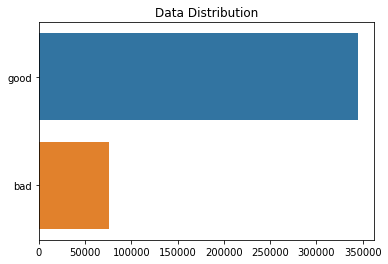

In [0]:
#ploting the count between the good and bad urls
import seaborn as sns
s = data['label'].value_counts()
sns.barplot(x=s.values, y=s.index)
plt.title('Data Distribution')

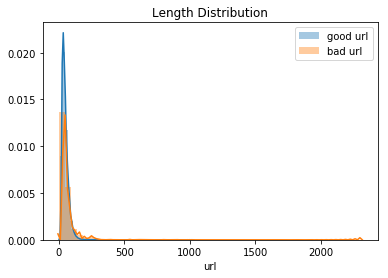

In [0]:
s1 = data[data['label'] == 'good']['url'].str.len()
sns.distplot(s1, label='good url')
s2 = data[data['label'] == 'bad']['url'].str.len()
sns.distplot(s2, label='bad url')
plt.title('Length Distribution')
plt.legend()

In [0]:
#mean of Good Urls and Bad Urls
print(s1.mean(), s2.mean())

47.00109912099321 54.455111510648706


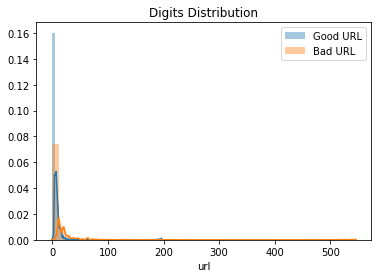

In [0]:
# we can notice that bad urls have length longer than the good urls and KDE represents digits in samples of good and bad urls with density function
s1 = data[data['label'] == 'good']['url'].str.replace(r'\D+', '').str.len()
sns.distplot(s1, label='Good URL')
s2 = data[data['label'] == 'bad']['url'].str.replace(r'\D+', '').str.len()
sns.distplot(s2, label='Bad URL')
plt.title('Digits Distribution')
plt.legend()

In [0]:
#Average Length of the digits in good  and bad urls 
print(s1.mean(), s2.mean())

3.3559353983661087 6.630236770091086


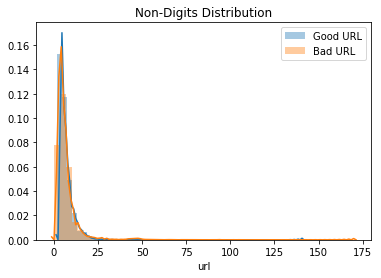

In [0]:
#KDE plot is drawn with non-digits in good and bad urls and kernel density function
s1 = data[data['label'] == 'good']['url'].str.replace(r'\w+', '').str.len()
sns.distplot(s1, label='Good URL')
s2 = data[data['label'] == 'bad']['url'].str.replace(r'\w+', '').str.len()
sns.distplot(s2, label='Bad URL')
plt.title('Non-Digits Distribution')
plt.legend()

In [0]:
#Average length of the non-digits in the good and bad urls
print(s1.mean(), s2.mean())

6.100185313539488 6.825139140435995


In [0]:
#exploiting the label coloumns with url count, unique and frequency of each url
data.groupby('label').describe()

url                                                            
        count  unique                                            top freq
label                                                                    
bad     75643   66448  d11m2p9mpffp32.cloudfront.net/main/web_zt.exe   27
good   344821  344800                    dnr.mo.gov/shpo/Jackson.htm    2

In [0]:
d={'bad':0,'good':1}
data['label']=data['label'].apply(lambda x:d[x])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['url'], data['label'], test_size=0.2, random_state=2)

In [0]:
def add_feature(X, feature_to_add):
    """
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    """
    from scipy.sparse import csr_matrix, hstack  #new features are creatCSR(sparse matrix) of coloumn wise matrix 
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [0]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

In [0]:
vect = TfidfVectorizer(min_df=5).fit(X_train)
X_train_vectorized = vect.transform(X_train)
X_train_vectorized = add_feature(X_train_vectorized, X_train.str.len()) #training the model with feature names and length of it 

# **MODEL 1**

### **Multinomial Naive Bayes**

In [0]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(alpha=0.1)
start=time.time()
model.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [0]:
X_test_vectorized = vect.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.len())
y_pred = model.predict(X_test_vectorized)
First_MutinomialNB =  round((accuracy_score(y_test, y_pred) * 100), 2)
Training_First_MutinomialNB = round((model.score(X_train_vectorized, y_train)*100),2)
print('Mutinomial Naive Bayes training Accuracy is : ',Training_First_MutinomialNB)
print('Mutinomial Naive Bayes testing Accuracy is : ',First_MutinomialNB)
row=["MultinomialNB",0.0,0.0,0.0,Training_First_MutinomialNB,First_MutinomialNB]


Mutinomial Naive Bayes training Accuracy is :  96.97
Mutinomial Naive Bayes testing Accuracy is :  96.63


In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_vectorized, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores*100)
print("Mean:", scores.mean()*100)
print("Standard Deviation:", scores.std())
print("Accuracy:",scores.mean()*100)

Scores: [96.82799215 96.81015518 96.84285629 96.79816868 96.87843743 96.8546541
 96.86059993 96.64357701 96.76537044 96.74753241]
Mean: 96.80293436364484
Standard Deviation: 0.0006623643928050792
Accuracy: 96.80293436364484


In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(model, X_train_vectorized, y_train, cv=10)
confusion_matrix(y_train, predictions)

array([[ 51519,   9139],
       [  1615, 274098]])

In [0]:
print("Precision: %f "%precision_score(y_train, predictions))
print("Recall: %f "%recall_score(y_train, predictions))
print("F1: %f"% f1_score(y_train, predictions))
row[1]=round(precision_score(y_train, predictions)*100,2)
row[2]=round(recall_score(y_train, predictions)*100,2)
row[3]=round(f1_score(y_train, predictions)*100,2)
print(row)

Precision: 0.967734 
Recall: 0.994142 
F1: 0.980760
['MultinomialNB', 96.77, 99.41, 98.08, 96.97, 96.63]


In [0]:
table.append(row)

In [0]:
#Precision Recall Curve
from sklearn.metrics import precision_recall_curve
# getting the probabilities of our predictions y_scores
y_scores = model.predict_proba(X_test_vectorized)
y_scores = y_scores[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)

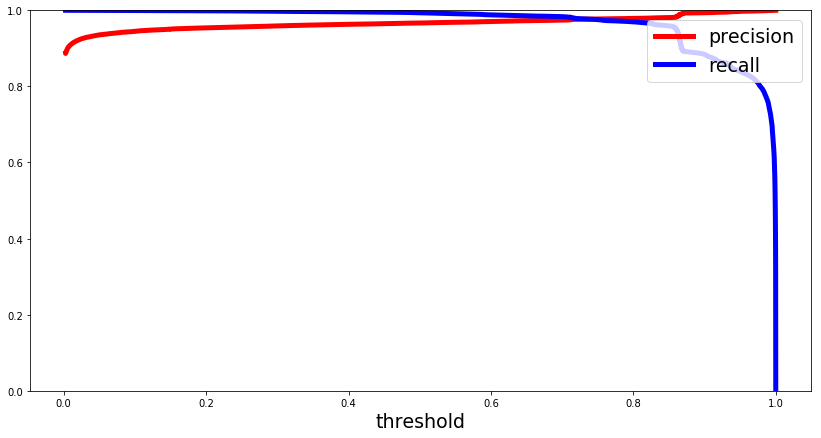

In [0]:

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [0]:
end=time.time()-start
print(end)

5.273763179779053


### **DecisionTree Classifier**

In [0]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
start=time.time()
model.fit(X_train_vectorized, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
row=["DecisionTreeClassifier",0.0,0.0,0.0,0.0,0.0]

In [0]:
X_test_vectorized = vect.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.len())
y_pred = model.predict(X_test_vectorized)
First_Decisiontree =  round((accuracy_score(y_test, y_pred) * 100), 2)
Training_decisiontree = round((model.score(X_train_vectorized, y_train)*100),2)
print('Decision  tree training Accuracy is : ',Training_decisiontree)
print('Decision tree Accuracy is : ',First_Decisiontree)
row[-1]=First_Decisiontree
row[-2]=Training_decisiontree

Decision  tree training Accuracy is :  98.52
Decision tree Accuracy is :  95.97


In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_vectorized, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores*100)
print("Mean:", scores.mean()*100)
print("Standard Deviation:", scores.std())
print("Accuracy:",scores.mean()*100)

Scores: [96.01046436 95.98668173 96.0461383  96.07574992 96.06385825 96.06980408
 96.06683117 95.98061658 96.0459032  96.10833631]
Mean: 96.04543838914029
Standard Deviation: 0.00038914864538049115
Accuracy: 96.04543838914029


In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(model, X_train_vectorized, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[ 51085,   9573],
       [  4786, 270927]])

In [0]:
print("Precision: %f "%precision_score(y_train, predictions))
print("Recall: %f "%recall_score(y_train, predictions))
print("F1: %f"% f1_score(y_train, predictions))
row[1]=round(precision_score(y_train, predictions)*100,2)
row[2]=round(recall_score(y_train, predictions)*100,2)
row[3]=round(f1_score(y_train, predictions)*100,2)

Precision: 0.965872 
Recall: 0.982641 
F1: 0.974184


In [0]:
table.append(row)

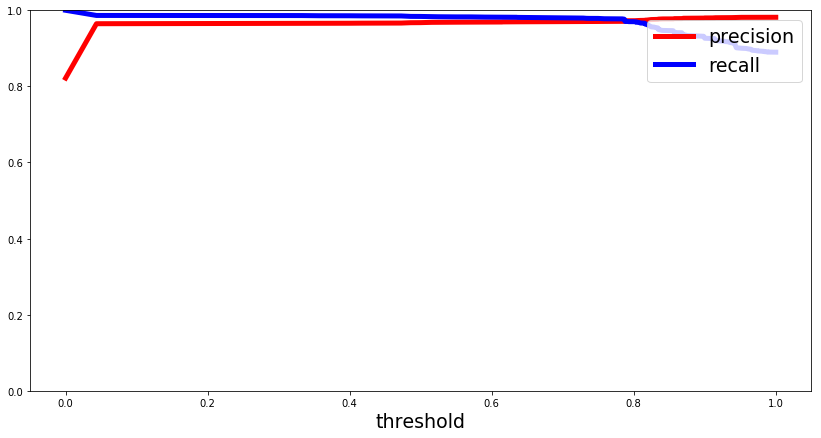

In [0]:
#Precision Recall Curve
from sklearn.metrics import precision_recall_curve
# getting the probabilities of our predictions y_scores
y_scores = model.predict_proba(X_test_vectorized)
y_scores = y_scores[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [0]:
end=time.time()-start
print(end)

3676.0650277137756


### **LinearSVC**

In [0]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
model = CalibratedClassifierCV(base_estimator=LinearSVC(penalty='l2', dual=False), cv=5)
start=time.time()
model.fit(X_train_vectorized, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
            cv=5, method='sigmoid')

In [0]:
X_test_vectorized = vect.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.len())
y_pred = model.predict(X_test_vectorized)
First_LinearSVC =  round((accuracy_score(y_test, y_pred) * 100), 2)
Training_First_LinearSVC = round((model.score(X_train_vectorized, y_train)*100),2)
print('LinearSVC training Accuracy is : ',Training_First_LinearSVC)
print('LinearSVC Accuracy is : ',First_LinearSVC)
row=["LinearSVC",0.0,0.0,0.0,0.0,0.0]
row[-1]=First_LinearSVC
row[-2]=Training_First_LinearSVC

LinearSVC training Accuracy is :  97.45
LinearSVC Accuracy is :  96.94


In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_vectorized, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores*100)
print("Mean:", scores.mean()*100)
print("Standard Deviation:", scores.std())
print("Accuracy:",scores.mean()*100)

Scores: [97.07770973 96.96176943 97.01230751 97.05086661 97.20545828 97.13708119
 96.96465202 97.09248744 97.17267214 97.03888691]
Mean: 97.07138912439387
Standard Deviation: 0.00078365052736296
Accuracy: 97.07138912439387


In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(model, X_train_vectorized, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[ 53319,   7339],
       [  2683, 273030]])

In [0]:
print("Precision: %f "%precision_score(y_train, predictions))
print("Recall: %f "%recall_score(y_train, predictions))
print("F1: %f"% f1_score(y_train, predictions))
row[1]=round(precision_score(y_train, predictions)*100,2)
row[2]=round(recall_score(y_train, predictions)*100,2)
row[3]=round(f1_score(y_train, predictions)*100,2)


Precision: 0.973824 
Recall: 0.990269 
F1: 0.981977


In [0]:
table.append(row)

In [0]:
#Precision Recall Curve
from sklearn.metrics import precision_recall_curve
# getting the probabilities of our predictions y_scores
y_scores = model.predict_proba(X_test_vectorized)
y_scores = y_scores[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)

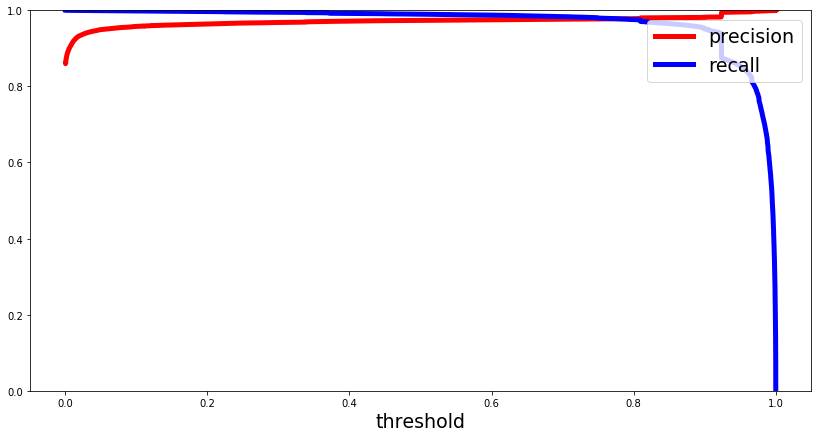

In [0]:
plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()


In [0]:
end=time.time()-start
print(end)

337.4657692909241


### **AdaBoostClassifier**

In [0]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
start=time.time()
model.fit(X_train_vectorized, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [0]:
X_test_vectorized = vect.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.len())
y_pred = model.predict(X_test_vectorized)
First_Adaboost =  round((accuracy_score(y_test, y_pred) * 100), 2)
Training_First_AdaBoost = round((model.score(X_train_vectorized, y_train)*100),2)
print('AdaBoost classifier training Accuracy is : ',Training_First_AdaBoost)
print('Adaboost testing Accuracy is : ',First_Adaboost)
row=["AdaBoostClassifier",0.0,0.0,0.0,0.0,0.0]
row[-2]=First_Adaboost
row[-1]=Training_First_AdaBoost

AdaBoost classifier training Accuracy is :  90.66
Adaboost testing Accuracy is :  90.49


In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_vectorized, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores*100)
print("Mean:", scores.mean()*100)
print("Standard Deviation:", scores.std())
print("Accuracy:",scores.mean()*100)

Scores: [90.52856888 90.63261787 90.6564005  90.41828938 90.72152689 90.66206856
 90.56098939 90.62936647 90.57557379 90.79260316]
Mean: 90.61780048931148
Standard Deviation: 0.0009894222914535468
Accuracy: 90.61780048931148


In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(model, X_train_vectorized, y_train, cv=3)
confusion_matrix(y_train, predictions)


array([[ 34109,  26549],
       [  4954, 270759]])

In [0]:
print("Precision: %f "%precision_score(y_train, predictions))
print("Recall: %f "%recall_score(y_train, predictions))
print("F1: %f"% f1_score(y_train, predictions))
row[1]=round(precision_score(y_train, predictions)*100,2)
row[2]=round(recall_score(y_train, predictions)*100,2)
row[3]=round(f1_score(y_train, predictions)*100,2)

Precision: 0.910702 
Recall: 0.982032 
F1: 0.945023


In [0]:
table.append(row)

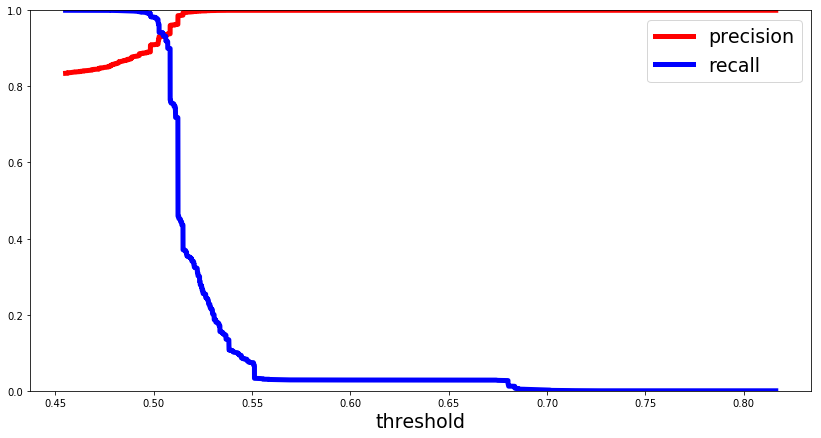

In [0]:
#Precision Recall Curve
from sklearn.metrics import precision_recall_curve
# getting the probabilities of our predictions y_scores
y_scores = model.predict_proba(X_test_vectorized)
y_scores = y_scores[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [0]:
end=time.time()-start
print(end)

549.1574673652649


### **LogisticRegression**

In [0]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
start=time.time()
model.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
X_test_vectorized = vect.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.len())
y_pred = model.predict(X_test_vectorized)
First_LogisticRegression =  round((accuracy_score(y_test, y_pred) * 100), 2)
Training_LogisticRegression = round((model.score(X_train_vectorized, y_train)*100),2)
print('LogisticRegression training Accuracy is : ',Training_LogisticRegression)
print('LogisticRegression testing Accuracy is : ',First_LogisticRegression)
row=["LogisticRegression",0,0,0,0,0]
row[-1]=First_LogisticRegression
row[-2]=Training_LogisticRegression

LogisticRegression training Accuracy is :  96.96
LogisticRegression testing Accuracy is :  96.56


In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_vectorized, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores*100)
print("Mean:", scores.mean()*100)
print("Standard Deviation:", scores.std())
print("Accuracy:",scores.mean()*100)

Scores: [96.518818   96.47719841 96.34639396 96.53952493 96.66736035 96.68817076
 96.46817493 96.52168743 96.66131526 96.60780117]
Mean: 96.54964451855413
Standard Deviation: 0.00101946009799301
Accuracy: 96.54964451855413


In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(model, X_train_vectorized, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[ 50179,  10479],
       [  1914, 273799]])

In [0]:
print("Precision: %f "%precision_score(y_train, predictions))
print("Recall: %f "%recall_score(y_train, predictions))
print("F1: %f"% f1_score(y_train, predictions))
row[1]=round(precision_score(y_train, predictions)*100,2)
row[2]=round(recall_score(y_train, predictions)*100,2)
row[3]=round(f1_score(y_train, predictions)*100,2)
table.append(row)

Precision: 0.963138 
Recall: 0.993058 
F1: 0.977869


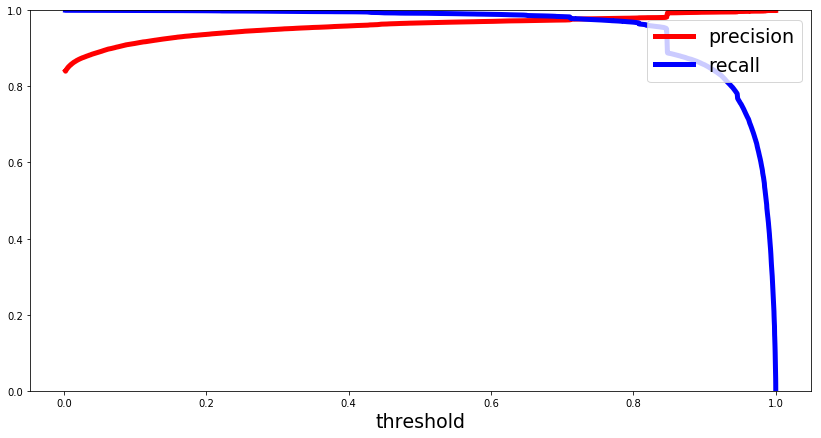

In [0]:
#Precision Recall Curve
from sklearn.metrics import precision_recall_curve
# getting the probabilities of our predictions y_scores
y_scores = model.predict_proba(X_test_vectorized)
y_scores = y_scores[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [0]:
end=time.time()-start
print(end)

77.34235310554504


### Random **Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
start=time.time()
model.fit(X_train_vectorized, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
X_test_vectorized = vect.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.len())
y_pred = model.predict(X_test_vectorized)
First_Randomforest =  round((accuracy_score(y_test, y_pred) * 100), 2)
Training_First_Randomforest = round((model.score(X_train_vectorized, y_train)*100),2)
print('Random Forest training Accuracy is : ',Training_First_Randomforest)
print('Random Forest testing Accuracy is : ',First_Randomforest)
row=["RandomForest",0.0,0.0,0.0,Training_First_Randomforest,First_Randomforest]


Random Forest training Accuracy is :  98.43
Random Forest testing Accuracy is :  96.63


In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_vectorized, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores*100)
print("Mean:", scores.mean()*100)
print("Standard Deviation:", scores.std())
print("Accuracy:",scores.mean()*100)

Scores: [96.6020572  96.5812474  96.6971877  96.64952285 96.93194994 96.69708951
 96.6762791  96.66438743 96.69401831 96.78320847]
Mean: 96.69769479066052
Standard Deviation: 0.0009423231647322861
Accuracy: 96.69769479066052


In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(model, X_train_vectorized, y_train, cv=10)
confusion_matrix(y_train, predictions)

array([[ 52783,   7875],
       [  3240, 272473]])

In [0]:
print("Precision: %f "%precision_score(y_train, predictions))
print("Recall: %f "%recall_score(y_train, predictions))
print("F1: %f"% f1_score(y_train, predictions))
row[1]=round(precision_score(y_train, predictions)*100,2)
row[2]=round(recall_score(y_train, predictions)*100,2)
row[3]=round(f1_score(y_train, predictions)*100,2)
print(row)

Precision: 0.971910 
Recall: 0.988249 
F1: 0.980011
['RandomForest', 97.19, 98.82, 98.0, 98.43, 96.63]


In [0]:
table.append(row)

In [0]:
#Precision Recall Curve
from sklearn.metrics import precision_recall_curve
# getting the probabilities of our predictions y_scores
y_scores = model.predict_proba(X_test_vectorized)
y_scores = y_scores[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)

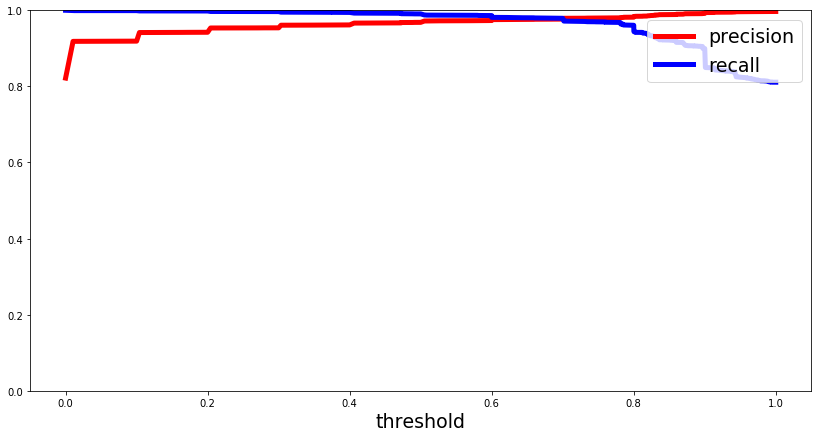

In [0]:
plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [0]:
end=time.time()-start
print(end)

1841.2166554927826


In [0]:
# now table is Complete
table.pop(0)
df1=pd.DataFrame(table,columns=["Classifier","Precision","Recall","F1 Score","Training %","Testing %"])
print(df1)

               Classifier  Precision  Recall  F1 Score  Training %  Testing %
0           MultinomialNB      96.77   99.41     98.08       96.97      96.63
1  DecisionTreeClassifier      96.59   98.26     97.42       98.52      95.97
2               LinearSVC      97.38   99.03     98.20       97.45      96.94
3      AdaBoostClassifier      91.07   98.20     94.50       90.49      90.66
4      LogisticRegression      96.31   99.31     97.79       96.96      96.56
5            RandomForest      97.19   98.82     98.00       98.43      96.63


# MODEL 2



In [0]:
vect = TfidfVectorizer(min_df=5, ngram_range=(1, 3)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
X_train_vectorized = add_feature(X_train_vectorized, X_train.str.len())
X_train_vectorized = add_feature(X_train_vectorized, X_train.str.replace(r'\D+', '').str.len())

In [0]:
table=[[]]

## Multinomial Naive Bayes

In [0]:
model = MultinomialNB(alpha=0.1)
start=time.time()
model.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [0]:
X_test_vectorized = vect.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.len())
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.replace(r'\D+', '').str.len())
y_pred = model.predict(X_test_vectorized)
Second_MutinomialNB =  round((accuracy_score(y_test, y_pred) * 100), 2)
Training_Second_MutinomialNB = round((model.score(X_train_vectorized, y_train)*100),2)
print('Mutinomial Naive Bayes training Accuracy is : ',Training_Second_MutinomialNB)
print('Mutinomial Naive Bayes Accuracy is : ',Second_MutinomialNB)
row=["MultinomialNB2",0,0,0,0,0]
row[-1]=Second_MutinomialNB
row[-2]=Training_Second_MutinomialNB

Mutinomial Naive Bayes training Accuracy is :  96.58
Mutinomial Naive Bayes Accuracy is :  96.24


In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_vectorized, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores*100)
print("Mean:", scores.mean()*100)
print("Standard Deviation:", scores.std())
print("Accuracy:",scores.mean()*100)

Scores: [96.45638861 96.30477436 96.48611689 96.30169159 96.41466243 96.46520201
 96.26601659 96.17682909 96.41752884 96.36401475]
Mean: 96.36532251468239
Standard Deviation: 0.000954611325070757
Accuracy: 96.36532251468239


In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(model, X_train_vectorized, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[ 51081,   9577],
       [  2953, 272760]])

In [0]:
print("Precision: %f "%precision_score(y_train, predictions))
print("Recall: %f "%recall_score(y_train, predictions))
print("F1: %f"% f1_score(y_train, predictions))
row[1]=round(precision_score(y_train, predictions)*100,2)
row[2]=round(recall_score(y_train, predictions)*100,2)
row[3]=round(f1_score(y_train, predictions)*100,2)
print(row)
table.append(row)

Precision: 0.966080 
Recall: 0.989290 
F1: 0.977547
['MultinomialNB2', 96.61, 98.93, 97.75, 96.58, 96.24]


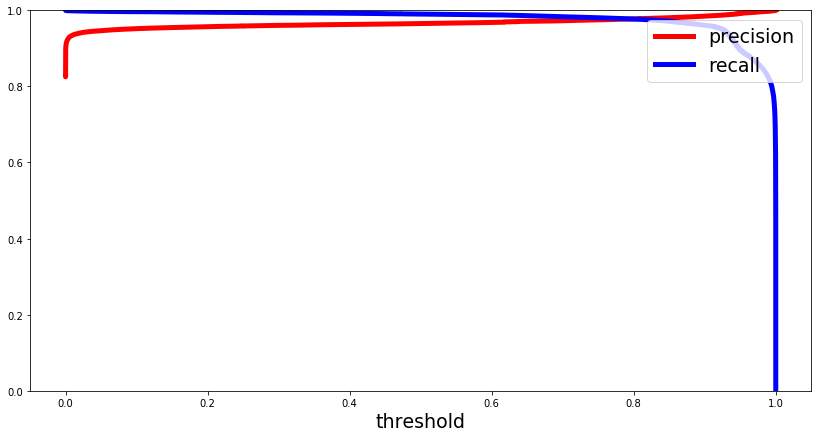

In [0]:
#Precision Recall Curve
from sklearn.metrics import precision_recall_curve
# getting the probabilities of our predictions y_scores
y_scores = model.predict_proba(X_test_vectorized)
y_scores = y_scores[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()


In [0]:
end=time.time()-start
print(end)

6.402043581008911


## **DecisionTreeClassifier**

In [0]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
start=time.time()
model.fit(X_train_vectorized, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
X_test_vectorized = vect.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.len())
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.replace(r'\D+', '').str.len())
y_pred = model.predict(X_test_vectorized)
Second_decision_tree = round((accuracy_score(y_test, y_pred) * 100),2)
Training_Second_Decisiontree = round((model.score(X_train_vectorized, y_train)*100),2)
print('Decision tree training Accuracy is : ',Training_Second_Decisiontree)
print('Decision Tree Accuracy is : ',Second_decision_tree)
row=["Decision Tree 2",0,0,0,0,0]
row[-1]=Second_decision_tree
row[-2]=Training_Second_Decisiontree

Decision tree training Accuracy is :  99.17
Decision Tree Accuracy is :  96.59


In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_vectorized, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores*100)
print("Mean:", scores.mean()*100)
print("Standard Deviation:", scores.std())
print("Accuracy:",scores.mean()*100)

Scores: [96.39098638 96.46530709 96.47719841 96.45628326 96.58114576 96.55141659
 96.56033535 96.44141868 96.53644904 96.69104531]
Mean: 96.51515858727731
Standard Deviation: 0.0008206587202787569
Accuracy: 96.51515858727731


In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(model, X_train_vectorized, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[ 52832,   7826],
       [  5178, 270535]])

In [0]:
print("Precision: %f "%precision_score(y_train, predictions))
print("Recall: %f "%recall_score(y_train, predictions))
print("F1: %f"% f1_score(y_train, predictions))
row[1]=round(precision_score(y_train, predictions)*100,2)
row[2]=round(recall_score(y_train, predictions)*100,2)
row[3]=round(f1_score(y_train, predictions)*100,2)

Precision: 0.971885 
Recall: 0.981220 
F1: 0.976530


In [0]:
table.append(row)

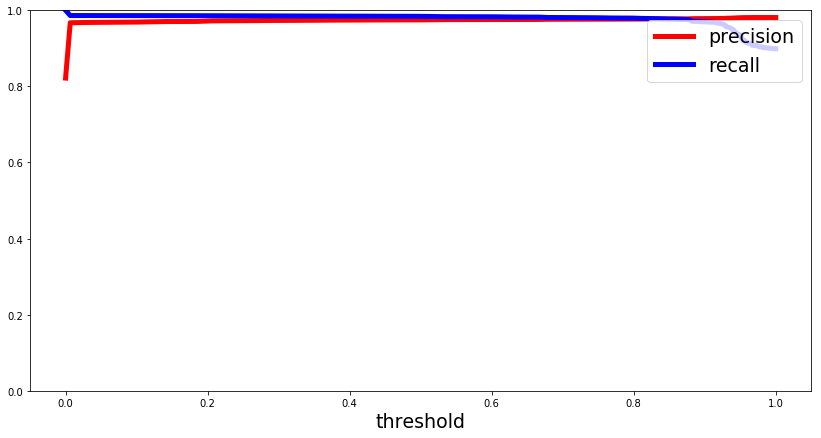

In [0]:
#Precision Recall Curve
from sklearn.metrics import precision_recall_curve
# getting the probabilities of our predictions y_scores
y_scores = model.predict_proba(X_test_vectorized)
y_scores = y_scores[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [0]:
end=time.time()-start
print(end)

3556.395776987076


## **LinearSVC**

In [0]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
model = CalibratedClassifierCV(base_estimator=LinearSVC(penalty='l2', dual=False), cv=5)
start=time.time()
model.fit(X_train_vectorized, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
            cv=5, method='sigmoid')

In [0]:
X_test_vectorized = vect.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.len())
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.replace(r'\D+', '').str.len())
y_pred = model.predict(X_test_vectorized)
Second_LinearSVC = round((accuracy_score(y_test, y_pred) * 100),2)
Training_Second_LinearSVC = round((model.score(X_train_vectorized, y_train)*100),2)
print('LinearSVC training Accuracy is : ',Training_Second_LinearSVC)
print('LinearSVC testing Accuracy is : ',Second_LinearSVC)
row=["LinearSVC2",0,0,0,0,0]
row[-1]=Second_LinearSVC
row[-2]=Training_Second_LinearSVC

LinearSVC training Accuracy is :  97.78
LinearSVC testing Accuracy is :  97.17


In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_vectorized, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores*100)
print("Mean:", scores.mean()*100)
print("Standard Deviation:", scores.std())
print("Accuracy:",scores.mean()*100)

Scores: [97.30067186 97.22635115 97.34229146 97.36004995 97.47896661 97.39869786
 97.23518744 97.3689687  97.36591747 97.36889047]
Mean: 97.34459929688582
Standard Deviation: 0.000712368377837264
Accuracy: 97.34459929688582


In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(model, X_train_vectorized, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[ 53820,   6838],
       [  2402, 273311]])

In [0]:
print("Precision: %f "%precision_score(y_train, predictions))
print("Recall: %f "%recall_score(y_train, predictions))
print("F1: %f"% f1_score(y_train, predictions))
row[1]=round(precision_score(y_train, predictions)*100,2)
row[2]=round(recall_score(y_train, predictions)*100,2)
row[3]=round(f1_score(y_train, predictions)*100,2)

Precision: 0.975592 
Recall: 0.991288 
F1: 0.983377


In [0]:
table.append(row)

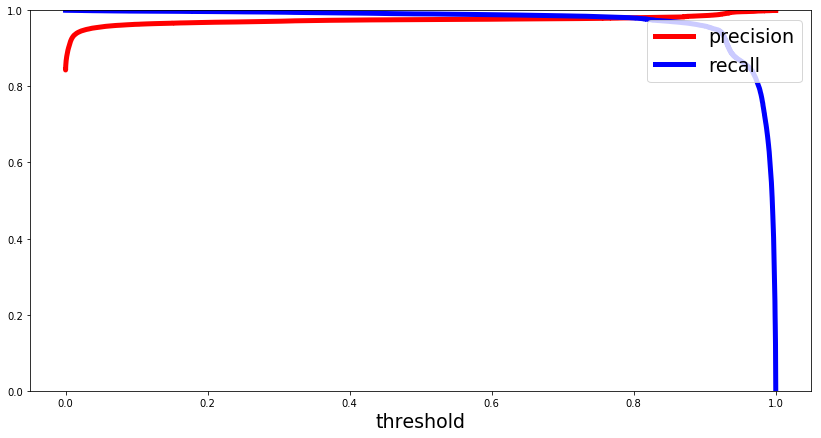

In [0]:
#Precision Recall Curve
from sklearn.metrics import precision_recall_curve
# getting the probabilities of our predictions y_scores
y_scores = model.predict_proba(X_test_vectorized)
y_scores = y_scores[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [0]:
end=time.time()-start
print(end)

819.0222420692444


## **AdaBoostClassifier**

In [0]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
start=time.time()
model.fit(X_train_vectorized, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [0]:
X_test_vectorized = vect.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.len())
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.replace(r'\D+', '').str.len())
y_pred = model.predict(X_test_vectorized)
Second_Adaboost =  round((accuracy_score(y_test, y_pred) * 100), 2)
Second_Adaboost_Training = round((model.score(X_train_vectorized, y_train)*100),2)
print('AdaBoost training Accuracy is : ',Second_Adaboost_Training)
print('Adaboost Accuracy is : ',Second_Adaboost)
row=["AdaBoost2",0,0,0,0,0]
row[-1]=Second_Adaboost
row[-2]=Second_Adaboost_Training

AdaBoost training Accuracy is :  90.75
Adaboost Accuracy is :  90.66


In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_vectorized, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores*100)
print("Mean:", scores.mean()*100)
print("Standard Deviation:", scores.std())
print("Accuracy:",scores.mean()*100)

Scores: [90.59694393 90.34722635 90.66829181 90.44504563 90.65314981 90.51639564
 90.42720813 90.5817998  90.3466524  90.72719705]
Mean: 90.53099105564513
Standard Deviation: 0.0012857803310044862
Accuracy: 90.53099105564513


In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(model, X_train_vectorized, y_train, cv=10)
confusion_matrix(y_train, predictions)

array([[ 33194,  27464],
       [  4387, 271326]])

In [0]:

print("Precision: %f "%precision_score(y_train, predictions))
print("Recall: %f "%recall_score(y_train, predictions))
print("F1: %f"% f1_score(y_train, predictions))
row[1]=round(precision_score(y_train, predictions)*100,2)
row[2]=round(recall_score(y_train, predictions)*100,2)
row[3]=round(f1_score(y_train, predictions)*100,2)

Precision: 0.908083 
Recall: 0.984089 
F1: 0.944559


In [0]:
table.append(row)

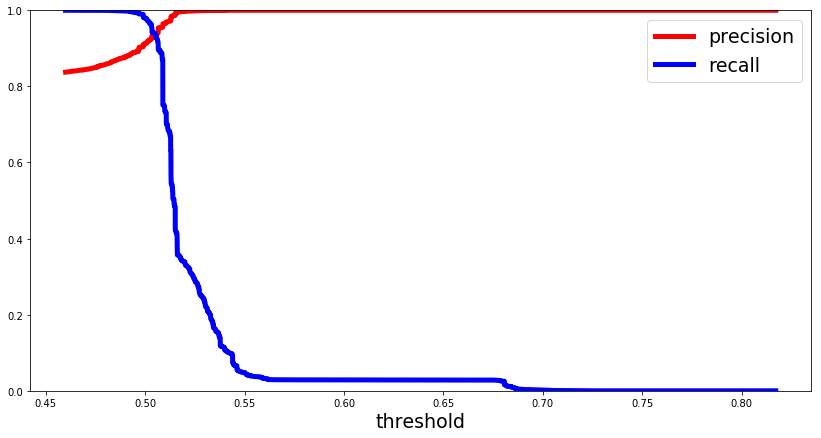

In [0]:
#Precision Recall Curve
from sklearn.metrics import precision_recall_curve
# getting the probabilities of our predictions y_scores
y_scores = model.predict_proba(X_test_vectorized)
y_scores = y_scores[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [0]:
end=time.time()-start
print(end)

1115.3598489761353


## **LogisticRegression**

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
start=time.time()
model.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
X_test_vectorized = vect.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.len())
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.replace(r'\D+', '').str.len())
y_pred = model.predict(X_test_vectorized)
Second_LogisticRegression =  round((accuracy_score(y_test, y_pred) * 100), 2)
Second_LogisticRegressionTraining= round((model.score(X_train_vectorized, y_train)*100),2)
print('LogisticRegression Training Accuracy is : ',Second_LogisticRegressionTraining)
print('LogisticRegression Accuracy is : ',Second_LogisticRegression)
row=["LogisticRegression2",0,0,0,0,0]
row[-1]=Second_LogisticRegression
row[-2]=Second_LogisticRegressionTraining

LogisticRegression Training Accuracy is :  97.15
LogisticRegression Accuracy is :  96.76


In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_vectorized, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores*100)
print("Mean:", scores.mean()*100)
print("Standard Deviation:", scores.std())
print("Accuracy:",scores.mean()*100)

Scores: [96.7179975  96.61097568 96.71205185 96.83087077 96.8724916  96.75952077
 96.63763118 96.67033326 96.85456059 96.6850993 ]
Mean: 96.7351532497989
Standard Deviation: 0.0008679930887537289
Accuracy: 96.7351532497989


In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(model, X_train_vectorized, y_train, cv=10)
confusion_matrix(y_train, predictions)

array([[ 51354,   9304],
       [  1678, 274035]])

In [0]:
print("Precision: %f "%precision_score(y_train, predictions))
print("Recall: %f "%recall_score(y_train, predictions))
print("F1: %f"% f1_score(y_train, predictions))
row[1]=round(precision_score(y_train, predictions)*100,2)
row[2]=round(recall_score(y_train, predictions)*100,2)
row[3]=round(f1_score(y_train, predictions)*100,2)

Precision: 0.967163 
Recall: 0.993914 
F1: 0.980356


In [0]:
table.append(row)

In [0]:
print(row)

['LogisticRegression2', 96.72, 99.39, 98.04, 97.15, 96.76]


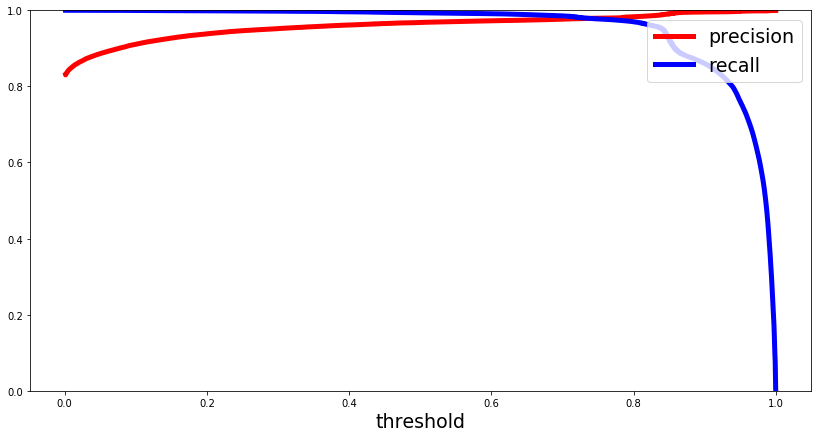

In [0]:
#Precision Recall Curve
from sklearn.metrics import precision_recall_curve
# getting the probabilities of our predictions y_scores
y_scores = model.predict_proba(X_test_vectorized)
y_scores = y_scores[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [0]:
end=time.time()-start
print(end)

312.6230776309967


## Random **Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
start=time.time()
model.fit(X_train_vectorized, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
X_test_vectorized = vect.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.len())
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.replace(r'\D+', '').str.len())
y_pred = model.predict(X_test_vectorized)
Third_RandomForest =  round((accuracy_score(y_test, y_pred) * 100), 2)
Training_RandomForest = round((model.score(X_train_vectorized, y_train)*100),2)
print('RandomForest training Accuracy is : ',Training_RandomForest)
print('RandomForest testing Accuracy is : ',Third_RandomForest)
row=["RandomForest2",0.0,0.0,0.0,Training_RandomForest,Third_RandomForest]


RandomForest training Accuracy is :  99.08
RandomForest testing Accuracy is :  97.38


In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_vectorized, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores*100)
print("Mean:", scores.mean()*100)
print("Standard Deviation:", scores.std())
print("Accuracy:",scores.mean()*100)

Scores: [97.24716095 97.28580772 97.40472085 97.34815828 97.52356037 97.41653536
 97.27680828 97.36302286 97.58294684 97.57402783]
Mean: 97.40227493321386
Standard Deviation: 0.0011614519952166786
Accuracy: 97.40227493321386


In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(model, X_train_vectorized, y_train, cv=10)
confusion_matrix(y_train, predictions)

array([[ 54987,   5671],
       [  3156, 272557]])

In [0]:
print("Precision: %f "%precision_score(y_train, predictions))
print("Recall: %f "%recall_score(y_train, predictions))
print("F1: %f"% f1_score(y_train, predictions))
row[1]=round(precision_score(y_train, predictions)*100,2)
row[2]=round(recall_score(y_train, predictions)*100,2)
row[3]=round(f1_score(y_train, predictions)*100,2)
print(row)

Precision: 0.979617 
Recall: 0.988553 
F1: 0.984065
['RandomForest2', 97.96, 98.86, 98.41, 99.08, 97.38]


In [0]:
table.append(row)

In [0]:
#Precision Recall Curve
from sklearn.metrics import precision_recall_curve
# getting the probabilities of our predictions y_scores
y_scores = model.predict_proba(X_test_vectorized)
y_scores = y_scores[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)

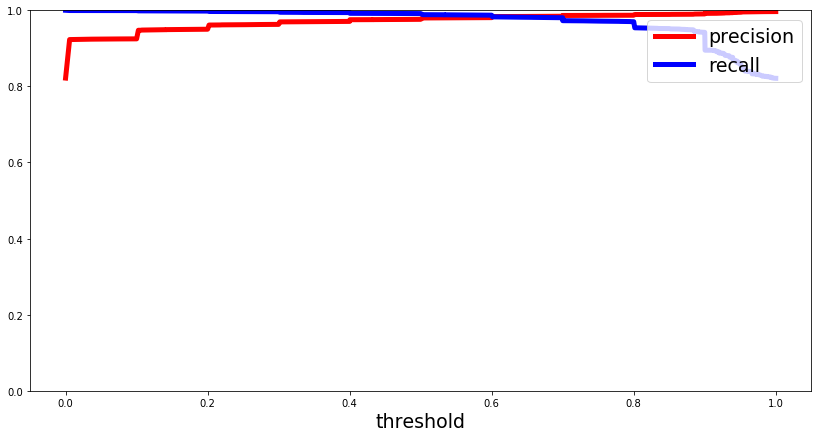

In [0]:

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [0]:
end=time.time()-start
print(end)

3156.0522906780243


In [0]:
table.pop(0)
df2=pd.DataFrame(table,columns=["Classifier","Precision","Recall","F1 Score","Training %","Testing %"])
print(df2)

            Classifier  Precision  Recall  F1 Score  Training %  Testing %
0       MultinomialNB2      96.61   98.93     97.75       96.58      96.24
1      Decision Tree 2      97.19   98.12     97.65       99.17      96.59
2           LinearSVC2      97.56   99.13     98.34       97.78      97.17
3            AdaBoost2      90.81   98.41     94.46       90.75      90.66
4  LogisticRegression2      96.72   99.39     98.04       97.15      96.76
5        RandomForest2      97.96   98.86     98.41       99.08      97.38


# MODEL 3 


In [0]:
vect = TfidfVectorizer(min_df=5, ngram_range=(2, 5)).fit(X_train)

print('Vocabulary len:', len(vect.get_feature_names()))
print('Longest word:', max(vect.vocabulary_, key=len))

X_train_vectorized = vect.transform(X_train)

X_train_vectorized = add_feature(X_train_vectorized, X_train.str.len())
X_train_vectorized = add_feature(X_train_vectorized, X_train.str.replace(r'\D+', '').str.len())
X_train_vectorized = add_feature(X_train_vectorized, X_train.str.replace(r'\w+', '').str.len())

Vocabulary len: 81556
Longest word: com khjkghkjhtyutryr34635465trhgfcvndsfgrey56765756yreytr greenbrookrec org cvbncvdsjfkdsghewuityewrui3495873485o34ui534y5324jkg53k4j5bv325nbmcvbncvdsjfkdsghewuityewrui3495873485o34ui534y5324jkg53k4j5bv325nbmcvbncvdsjfkdsghewuityewrui3495873485o34ui534y5324jkg53k4j5bv325nbm


In [0]:
table=[[]]

## **MultinomialNB**

In [0]:
model = MultinomialNB(alpha=0.1)
start=time.time()
model.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [0]:
X_test_vectorized = vect.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.len())
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.replace(r'\D+', '').str.len())
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.replace(r'\w+', '').str.len())
y_pred = model.predict(X_test_vectorized)
Third_MutinomialNB =  round((accuracy_score(y_test, y_pred) * 100), 2)
Training_Third_MutinomialNB = round((model.score(X_train_vectorized, y_train)*100),2)
print('Mutinomial Naive Bayes training Accuracy is : ',Training_Third_MutinomialNB)
print('Mutinomial Naive Bayes Accuracy is : ',Third_MutinomialNB)
row=["MultinomialNB3",0,0,0,0,0]
row[-1]=Third_MutinomialNB
row[-2]=Training_Third_MutinomialNB

Mutinomial Naive Bayes training Accuracy is :  94.75
Mutinomial Naive Bayes Accuracy is :  94.43


In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_vectorized, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores*100)
print("Mean:", scores.mean()*100)
print("Standard Deviation:", scores.std())
print("Accuracy:",scores.mean()*100)

Scores: [94.64593614 94.54783281 94.69944705 94.69928947 94.63091239 94.52388739
 94.51496864 94.54767072 94.60102271 94.63372577]
Mean: 94.6044693091907
Standard Deviation: 0.0006498906036384423
Accuracy: 94.6044693091907


In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(model, X_train_vectorized, y_train, cv=10)
confusion_matrix(y_train, predictions)

array([[ 45674,  14984],
       [  3165, 272548]])

In [0]:
print("Precision: %f "%precision_score(y_train, predictions))
print("Recall: %f "%recall_score(y_train, predictions))
print("F1: %f"% f1_score(y_train, predictions))
row[1]=round(precision_score(y_train, predictions)*100,2)
row[2]=round(recall_score(y_train, predictions)*100,2)
row[3]=round(f1_score(y_train, predictions)*100,2)

Precision: 0.947888 
Recall: 0.988521 
F1: 0.967778


In [0]:
table.append(row)

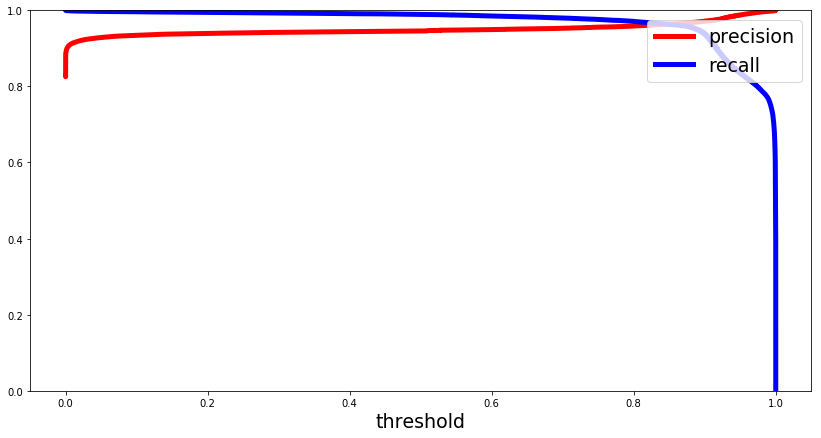

In [0]:
#Precision Recall Curve
from sklearn.metrics import precision_recall_curve
# getting the probabilities of our predictions y_scores
y_scores = model.predict_proba(X_test_vectorized)
y_scores = y_scores[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [0]:
end=time.time()-start
print(end)

7.503722667694092


## **DecisionTreeClassifier**


In [0]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
start=time.time()
model.fit(X_train_vectorized, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
X_test_vectorized = vect.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.len())
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.replace(r'\D+', '').str.len())
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.replace(r'\w+', '').str.len())
y_pred = model.predict(X_test_vectorized)
Third_Decisiontree =  round((accuracy_score(y_test, y_pred) * 100), 2)
Training_Third_Decisiontree = round((model.score(X_train_vectorized, y_train)*100),2)
print('DecisionTree training Accuracy is : ',Training_Third_Decisiontree)
print('DecisionTree Accuracy is : ',Third_Decisiontree)
row=["DecisionTree3",0,0,0,0,0]
row[-1]=Third_Decisiontree
row[-2]=Training_Third_Decisiontree

DecisionTree training Accuracy is :  97.67
DecisionTree Accuracy is :  93.35


In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_vectorized, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores*100)
print("Mean:", scores.mean()*100)
print("Standard Deviation:", scores.std())
print("Accuracy:",scores.mean()*100)

Scores: [93.14465783 93.05844581 93.35572864 93.11472486 93.32877486 93.25742486
 93.31093736 92.63311235 93.26911642 93.22154834]
Mean: 93.16944713212382
Standard Deviation: 0.002010172948025063
Accuracy: 93.16944713212382


In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(model, X_train_vectorized, y_train, cv=10)
confusion_matrix(y_train, predictions)

array([[ 48125,  12533],
       [ 10371, 265342]])

In [0]:
print("Precision: %f "%precision_score(y_train, predictions))
print("Recall: %f "%recall_score(y_train, predictions))
print("F1: %f"% f1_score(y_train, predictions))
row[1]=round(precision_score(y_train, predictions)*100,2)
row[2]=round(recall_score(y_train, predictions)*100,2)
row[3]=round(f1_score(y_train, predictions)*100,2)

Precision: 0.954897 
Recall: 0.962385 
F1: 0.958626


In [0]:
table.append(row)

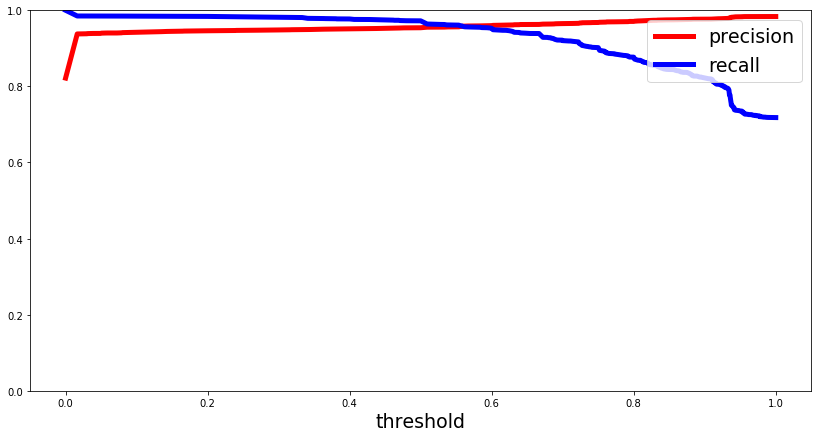

In [0]:
#Precision Recall Curve
from sklearn.metrics import precision_recall_curve
# getting the probabilities of our predictions y_scores
y_scores = model.predict_proba(X_test_vectorized)
y_scores = y_scores[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [0]:
end=time.time()-start
print(end)

5457.644064426422


## **LinearSVC**

In [0]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
start=time.time()
model = CalibratedClassifierCV(base_estimator=LinearSVC(penalty='l2', dual=False), cv=5)
model.fit(X_train_vectorized, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
            cv=5, method='sigmoid')

In [0]:
X_test_vectorized = vect.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.len())
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.replace(r'\D+', '').str.len())
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.replace(r'\w+', '').str.len())
y_pred = model.predict(X_test_vectorized)
Third_LinearSVC =  round((accuracy_score(y_test, y_pred) * 100), 2)
Training_Third_LinearSVC = round((model.score(X_train_vectorized, y_train)*100),2)
print('LinearSVC training Accuracy is : ',Training_Third_LinearSVC)
print('LinearSVC Accuracy is : ',Third_LinearSVC)
row=["LinearSVC3",0,0,0,0,0]
row[-1]=Third_LinearSVC
row[-2]=Training_Third_LinearSVC

LinearSVC training Accuracy is :  95.44
LinearSVC Accuracy is :  94.96


In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_vectorized, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores*100)
print("Mean:", scores.mean()*100)
print("Standard Deviation:", scores.std())
print("Accuracy:",scores.mean()*100)

Scores: [95.14834413 95.03537666 95.20185504 95.22252282 95.25225198 95.08279573
 95.05603948 95.01441865 95.16589369 95.20156975]
Mean: 95.13810679278055
Standard Deviation: 0.0008047986478693334
Accuracy: 95.13810679278055


In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(model, X_train_vectorized, y_train, cv=10)
confusion_matrix(y_train, predictions)

array([[ 46603,  14055],
       [  2299, 273414]])

In [0]:
print("Precision: %f "%precision_score(y_train, predictions))
print("Recall: %f "%recall_score(y_train, predictions))
print("F1: %f"% f1_score(y_train, predictions))
row[1]=round(precision_score(y_train, predictions)*100,2)
row[2]=round(recall_score(y_train, predictions)*100,2)
row[3]=round(f1_score(y_train, predictions)*100,2)


Precision: 0.951108 
Recall: 0.991662 
F1: 0.970961


In [0]:
table.append(row)

In [0]:
#Precision Recall Curve
from sklearn.metrics import precision_recall_curve
# getting the probabilities of our predictions y_scores
y_scores = model.predict_proba(X_test_vectorized)
y_scores = y_scores[:,1]
plt.figure(figsize=(14, 7))
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
plt.show()

<Figure size 1008x504 with 0 Axes>

In [0]:
end=time.time()-start
print(end)

827.1985025405884


## **AdaBoostClassifier**

In [0]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
start=time.time()
model.fit(X_train_vectorized, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [0]:

X_test_vectorized = vect.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.len())
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.replace(r'\D+', '').str.len())
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.replace(r'\w+', '').str.len())
y_pred = model.predict(X_test_vectorized)
Third_Adaboost =  round((accuracy_score(y_test, y_pred) * 100), 2)
Training_Third_Adaboost = round((model.score(X_train_vectorized, y_train)*100),2)
print('Adaboost training Accuracy is : ',Training_Third_Adaboost)
print('Adaboost Accuracy is : ',Third_Adaboost)
row=["AdaBoost3",0,0,0,0,0]
row[-1]=Third_Adaboost
row[-2]=Training_Third_Adaboost

Adaboost training Accuracy is :  86.31
Adaboost Accuracy is :  86.46


In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_vectorized, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores*100)
print("Mean:", scores.mean()*100)
print("Standard Deviation:", scores.std())
print("Accuracy:",scores.mean()*100)


Scores: [86.26850586 85.98311433 86.43795707 86.43160805 86.40782472 86.37809555
 86.34242055 86.16107263 86.1606612  86.44309668]
Mean: 86.30143566364603
Standard Deviation: 0.0014712511406821242
Accuracy: 86.30143566364603


In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(model, X_train_vectorized, y_train, cv=10)
confusion_matrix(y_train, predictions)

array([[ 19427,  41231],
       [  4847, 270866]])

In [0]:
print("Precision: %f "%precision_score(y_train, predictions))
print("Recall: %f "%recall_score(y_train, predictions))
print("F1: %f"% f1_score(y_train, predictions))
row[1]=round(precision_score(y_train, predictions)*100,2)
row[2]=round(recall_score(y_train, predictions)*100,2)
row[3]=round(f1_score(y_train, predictions)*100,2)


Precision: 0.867890 
Recall: 0.982420 
F1: 0.921611


In [0]:
table.append(row)

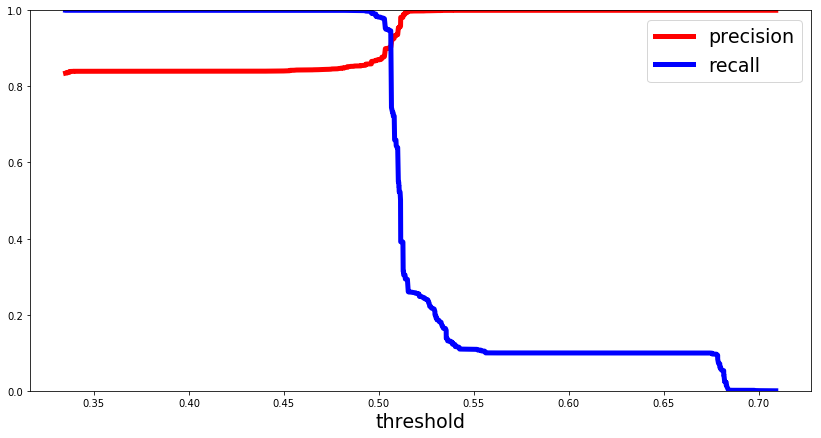

In [0]:
#Precision Recall Curve
from sklearn.metrics import precision_recall_curve
# getting the probabilities of our predictions y_scores
y_scores = model.predict_proba(X_test_vectorized)
y_scores = y_scores[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [0]:
end=time.time()-start
print(end)

618.0625202655792


## **LogisticRegression**

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
start=time.time()
model.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
X_test_vectorized = vect.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.len())
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.replace(r'\D+', '').str.len())
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.replace(r'\w+', '').str.len())
y_pred = model.predict(X_test_vectorized)
Third_LogisticRegression =  round((accuracy_score(y_test, y_pred) * 100), 2)
Training_LogisticRegression = round((model.score(X_train_vectorized, y_train)*100),2)
print('LogisticRegression training Accuracy is : ',Training_LogisticRegression)
print('LogisticRegression Accuracy is : ',Third_LogisticRegression)
row=["LogisticRegression3",0,0,0,0,0]
row[-1]=Third_LogisticRegression
row[-2]=Training_LogisticRegression


LogisticRegression training Accuracy is :  94.31
LogisticRegression Accuracy is :  93.9


In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_vectorized, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores*100)
print("Mean:", scores.mean()*100)
print("Standard Deviation:", scores.std())
print("Accuracy:",scores.mean()*100)

Scores: [94.00083239 93.95623997 94.26838694 94.5982103  94.45848322 94.24443321
 94.23254155 93.82525195 94.33047925 94.36912831]
Mean: 94.22839871019491
Standard Deviation: 0.0022587213155348933
Accuracy: 94.22839871019491


In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(model, X_train_vectorized, y_train, cv=10)
confusion_matrix(y_train, predictions)

array([[ 42138,  18520],
       [   894, 274819]])

In [0]:
print("Precision: %f "%precision_score(y_train, predictions))
print("Recall: %f "%recall_score(y_train, predictions))
print("F1: %f"% f1_score(y_train, predictions))
row[1]=round(precision_score(y_train, predictions)*100,2)
row[2]=round(recall_score(y_train, predictions)*100,2)
row[3]=round(f1_score(y_train, predictions)*100,2)

Precision: 0.936865 
Recall: 0.996757 
F1: 0.965884


In [0]:
table.append(row)

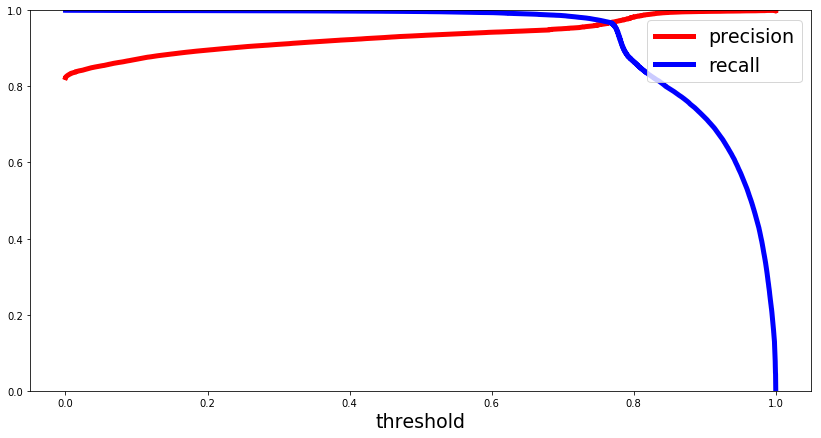

In [0]:
#Precision Recall Curve
from sklearn.metrics import precision_recall_curve
# getting the probabilities of our predictions y_scores
y_scores = model.predict_proba(X_test_vectorized)
y_scores = y_scores[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()


In [0]:
end=time.time()-start
print(end)

229.78329062461853


## Random **Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
start=time.time()
model.fit(X_train_vectorized, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
X_test_vectorized = vect.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.len())
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.replace(r'\D+', '').str.len())
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.replace(r'\w+', '').str.len())
y_pred = model.predict(X_test_vectorized)
Third_RandomForest =  round((accuracy_score(y_test, y_pred) * 100), 2)
Training_Third_RandomForest = round((model.score(X_train_vectorized, y_train)*100),2)
print('RandomForest training Accuracy is : ',Training_Third_RandomForest)
print('RandomForest testing Accuracy is : ',Third_RandomForest)
row=["RandomForest3",0.0,0.0,0.0,Training_Third_RandomForest,Third_RandomForest]


RandomForest training Accuracy is :  97.57
RandomForest testing Accuracy is :  95.11


In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_vectorized, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores*100)
print("Mean:", scores.mean()*100)
print("Standard Deviation:", scores.std())
print("Accuracy:",scores.mean()*100)

Scores: [95.16023545 94.91051787 95.13347999 95.24927907 95.22549573 95.12441657
 95.05009365 94.93712281 95.2312998  95.14508265]
Mean: 95.11670235796635
Standard Deviation: 0.0011170689467592638
Accuracy: 95.11670235796635


In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(model, X_train_vectorized, y_train, cv=10)
confusion_matrix(y_train, predictions)

array([[ 50006,  10652],
       [  5864, 269849]])

In [0]:
print("Precision: %f "%precision_score(y_train, predictions))
print("Recall: %f "%recall_score(y_train, predictions))
print("F1: %f"% f1_score(y_train, predictions))
row[1]=round(precision_score(y_train, predictions)*100,2)
row[2]=round(recall_score(y_train, predictions)*100,2)
row[3]=round(f1_score(y_train, predictions)*100,2)
print(row)

Precision: 0.962025 
Recall: 0.978732 
F1: 0.970306
['RandomForest3', 96.2, 97.87, 97.03, 97.57, 95.11]


In [0]:
table.append(row)

In [0]:
#Precision Recall Curve
from sklearn.metrics import precision_recall_curve
# getting the probabilities of our predictions y_scores
y_scores = model.predict_proba(X_test_vectorized)
y_scores = y_scores[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)

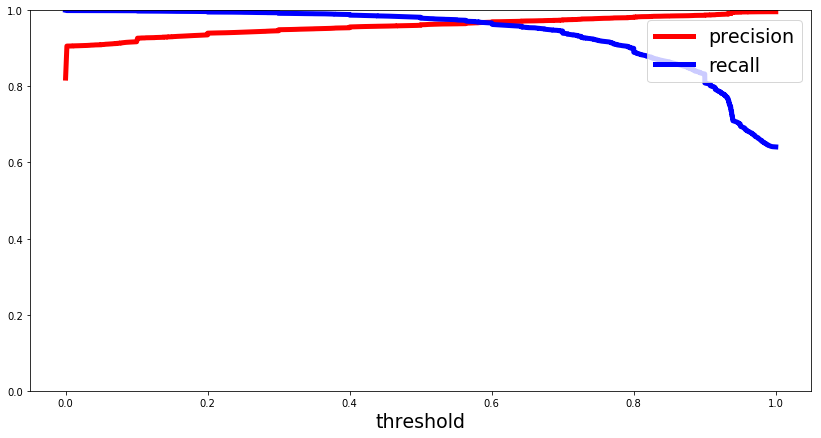

In [0]:

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [0]:
end=time.time()-start
print(end)

3853.7823214530945


In [0]:
# now table is Complete
table.pop(0)
df3=pd.DataFrame(table,columns=["Classifier","Precision","Recall","F1 Score","Training %","Testing %"])
print(df3)

            Classifier  Precision  Recall  F1 Score  Training %  Testing %
0       MultinomialNB3      94.79   98.85     96.78       94.75      94.43
1        DecisionTree3      95.49   96.24     95.86       97.67      93.35
2           LinearSVC3      95.11   99.17     97.10       95.44      94.96
3            AdaBoost3      86.79   98.24     92.16       86.31      86.46
4  LogisticRegression3      93.69   99.68     96.59       94.31      93.90
5        RandomForest3      96.20   97.87     97.03       97.57      95.11
